In [1]:
%matplotlib widget
import obspy
from obspy.signal.trigger import classic_sta_lta, recursive_sta_lta, aic_simple
from obspy.signal.trigger import plot_trigger
from obspy.signal.trigger import coincidence_trigger
from obspy.signal.trigger import ar_pick
from obspy.signal.cross_correlation import correlation_detector
from obspy.realtime.signal import kurtosis
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plot_working
import event_processing
import matplotlib.ticker as ticker
from datetime import datetime
from datetime import timedelta

In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
chan_z = 'GHZ'
chan_x = 'GH2'
chan_y = 'GH1'
#statlist = [ 'A01' ,'A03' , 'A05' , 'A07' , 'A09' , 'A11' , 'A13' , 'A15' , 'A17' , 'A19' ]
statlist = [ 'A01' ,'A04']# , 'A03' , 'A04']# , 'A05' , 'A06' , 'A07' , 'A08' , 'A09', 'A10' , 'A11', 'A13', 'A14', 'A19']#, 'A16', 'A17', 'A18', 'A19' ]
#statlist = [ 'B01' ,'B02' , 'B03' , 'B04' , 'B06' , 'B07' , 'B08' , 'B09','B10' , 'B11', 'B12', 'B13' , 'B19' , 'B20']#,'B14','B15','B16','B17','B18','B19', 'B20' ]

day = 15
hr = 15
start_time = obspy.UTCDateTime('2020-1-' + str(day) + 'T00:00:00')+hr*3600
end_time = obspy.UTCDateTime('2020-1-' + str(day) + 'T00:00:00')+(hr+1)*3600
stream_z = obspy.read("/media/sbrent/Oman3/PASSCAL/Main_deployment/DAYS/" +statlist[0]+ "/*.." + chan_z +".2020.0" +str(day))
stream_x = obspy.read("/media/sbrent/Oman3/PASSCAL/Main_deployment/DAYS/" +statlist[0]+ "/*.." + chan_x +".2020.0" +str(day))
stream_y = obspy.read("/media/sbrent/Oman3/PASSCAL/Main_deployment/DAYS/" +statlist[0]+ "/*.." + chan_y +".2020.0" +str(day))

In [4]:
for s in statlist[1:]:
    
    stream_z += obspy.read("/media/sbrent/Oman3/PASSCAL/Main_deployment/DAYS/" + s + "/*.." + chan_z + ".2020.0" + str(day))
    stream_x += obspy.read("/media/sbrent/Oman3/PASSCAL/Main_deployment/DAYS/" + s + "/*.." + chan_x + ".2020.0" + str(day))
    stream_y += obspy.read("/media/sbrent/Oman3/PASSCAL/Main_deployment/DAYS/" + s + "/*.." + chan_y + ".2020.0" + str(day))

In [5]:
data_z = stream_z.slice(starttime=start_time,endtime=end_time)
data_x = stream_x.slice(starttime=start_time,endtime=end_time) #look into trim()
data_y = stream_y.slice(starttime=start_time,endtime=end_time) #look into trim()

In [6]:
class PrecisionDateFormatter(ticker.Formatter):
    """
    Extend the `matplotlib.ticker.Formatter` class to allow for millisecond
    precision when formatting a tick (in days since the epoch) with a
    `~datetime.datetime.strftime` format string.

    """

    def __init__(self, fmt, precision=3, tz=None):
        """
        Parameters
        ----------
        fmt : str
            `~datetime.datetime.strftime` format string.
        """
        from matplotlib.dates import num2date
        if tz is None:
            from matplotlib.dates import _get_rc_timezone
            tz = _get_rc_timezone()
        self.num2date = num2date
        self.fmt = fmt
        self.tz = tz
        self.precision = precision

    def __call__(self, x, pos=0):
        if x == 0:
            raise ValueError("DateFormatter found a value of x=0, which is "
                             "an illegal date; this usually occurs because "
                             "you have not informed the axis that it is "
                             "plotting dates, e.g., with ax.xaxis_date()")

        dt = self.num2date(x, self.tz)
        ms = dt.strftime("%f")[:self.precision]

        return dt.strftime(self.fmt).format(ms=ms)

    def set_tzinfo(self, tz):
        self.tz = tz

In [7]:
win_time = obspy.UTCDateTime('2020-1-' + str(day) + 'T15:21:47')
g_wind = event_processing.get_event_window_raw(data_z,win_time)

In [8]:
win_time = obspy.UTCDateTime('2020-1-' + str(day) + 'T15:21:47')
data_window_z = event_processing.get_waveforms_window(data_z,win_time)
data_window_x = event_processing.get_waveforms_window(data_x,win_time)
data_window_y = event_processing.get_waveforms_window(data_y,win_time)

2020-01-15T15:21:46.900000Z
2020-01-15T15:21:47.800000Z
2020-01-15T15:21:46.900000Z
2020-01-15T15:21:47.800000Z
2020-01-15T15:21:46.900000Z
2020-01-15T15:21:47.800000Z


In [9]:
data_z_cp = data_window_z.copy()

In [26]:
data_z_filtered_cp = data_window_z.copy()
data_z_filtered_cp2 = data_window_z.copy()
data_z_filtered_cp3 = data_window_z.copy()
data_z_filtered_cp4 = data_window_z.copy()
data_z_filtered_cp5 = data_window_z.copy()


In [11]:
data_z_filtered_cp4070 = data_z_filtered_cp.filter('bandpass', freqmin=40, freqmax=70, zerophase=True, corners=4)

In [12]:
data_z_filtered_cp70200 = data_z_filtered_cp2.filter('bandpass', freqmin=70, freqmax=200, zerophase=True, corners=4)

In [13]:
data_z_filtered_cp70200 = data_z_filtered_cp3.filter('bandpass', freqmin=40, freqmax=200, zerophase=True, corners=4)

In [20]:
data_z_filtered_cp200 = data_z_filtered_cp4.filter('highpass', corners=4, freq=200, zerophase=False)

In [30]:
data_z_filtered_cp05 = data_z_filtered_cp5.filter('lowpass', corners=4, freq=0.05, zerophase=True)

In [14]:
T_in = data_z_filtered_cp4070[0].times("matplotlib")

In [15]:
import numpy as np
from copy import copy, deepcopy
from obspy.core import Trace


def do_fft(signal, delta):
    """Compute the complex Fourier transform of a signal."""
    npts = len(signal)
    if not npts % 2:
        npts -= 1

    fft = np.fft.rfft(signal, n=npts) * delta
    fftfreq = np.fft.fftfreq(len(signal), d=delta)
    fftfreq = fftfreq[0:fft.size]
    return fft, fftfreq



def do_spectrum(trace):
    """Compute the spectrum of an ObsPy Trace object."""
    signal = trace.data
    delta = trace.stats.delta
    amp, freq = do_fft(signal, delta)
    return amp, freq

In [ ]:
fig, ax = plt.subplots(1, figsize=(17, 10), sharex=True, sharey=False)

#for i in np.arange(0, len(data), 1):
    # plot waveform
#ax.plot(T_in, data_z_filtered_cp4070[0].data, color='black')
#ax.plot(T_in, data_z_filtered_cp70200[0].data, color='blue')
ax.plot(T_in, data_z_cp[0].data, 'green')
    #ax[i].plot(times_mat[i], waveforms_hp[i], color='blue')
#ax.plot(data[0].times('matplotlib'), stream_bp1[0].data, color='green')
#ax.plot(data[0].times('matplotlib'), stream_bp2[0].data, color='blue')
#ax.plot(data[0].times('matplotlib'), stream_bp3[0].data, color='orange')

#ax.plot(data[0].times('matplotlib'), stream_bp4[0].data, color='red')
#ax.plot(data[0].times('matplotlib'), stream_bp5[0].data, color='violet')
#ax.plot(data[0].times('matplotlib'), stream_bp6[0].data, color='dodgerblue')
#ax.plot(data[0].times('matplotlib'), stream_bp7[0].data, color='gray')
#plt.axvline(x = p_pick_plt, color = 'b', label = 'axvline - full height')
#plt.axvline(x = T_in_utcd[0]+ p_pick2, color = 'r', label = 'axvline - full height')
#ax.plot(T_in_utcd[0] + p_pick, 5000, color='darkred')
ax.xaxis.set_major_formatter(PrecisionDateFormatter("%H:%M:%S.{ms}"))

In [ ]:
fig, ax = plt.subplots(1, figsize=(17, 10), sharex=True, sharey=False)

#for i in np.arange(0, len(data), 1):
    # plot waveform
ax.plot(T_in, data_z_filtered_cp4070[0].data, color='black')
ax.plot(T_in, data_z_filtered_cp70200[0].data, color='blue')
ax.plot(T_in, data_z_cp[0].data, 'green')
    #ax[i].plot(times_mat[i], waveforms_hp[i], color='blue')
#ax.plot(data[0].times('matplotlib'), stream_bp1[0].data, color='green')
#ax.plot(data[0].times('matplotlib'), stream_bp2[0].data, color='blue')
#ax.plot(data[0].times('matplotlib'), stream_bp3[0].data, color='orange')

#ax.plot(data[0].times('matplotlib'), stream_bp4[0].data, color='red')
#ax.plot(data[0].times('matplotlib'), stream_bp5[0].data, color='violet')
#ax.plot(data[0].times('matplotlib'), stream_bp6[0].data, color='dodgerblue')
#ax.plot(data[0].times('matplotlib'), stream_bp7[0].data, color='gray')
#plt.axvline(x = p_pick_plt, color = 'b', label = 'axvline - full height')
#plt.axvline(x = T_in_utcd[0]+ p_pick2, color = 'r', label = 'axvline - full height')
#ax.plot(T_in_utcd[0] + p_pick, 5000, color='darkred')
ax.xaxis.set_major_formatter(PrecisionDateFormatter("%H:%M:%S.{ms}"))

In [33]:
amp, freq = do_spectrum(data_z_cp[1])

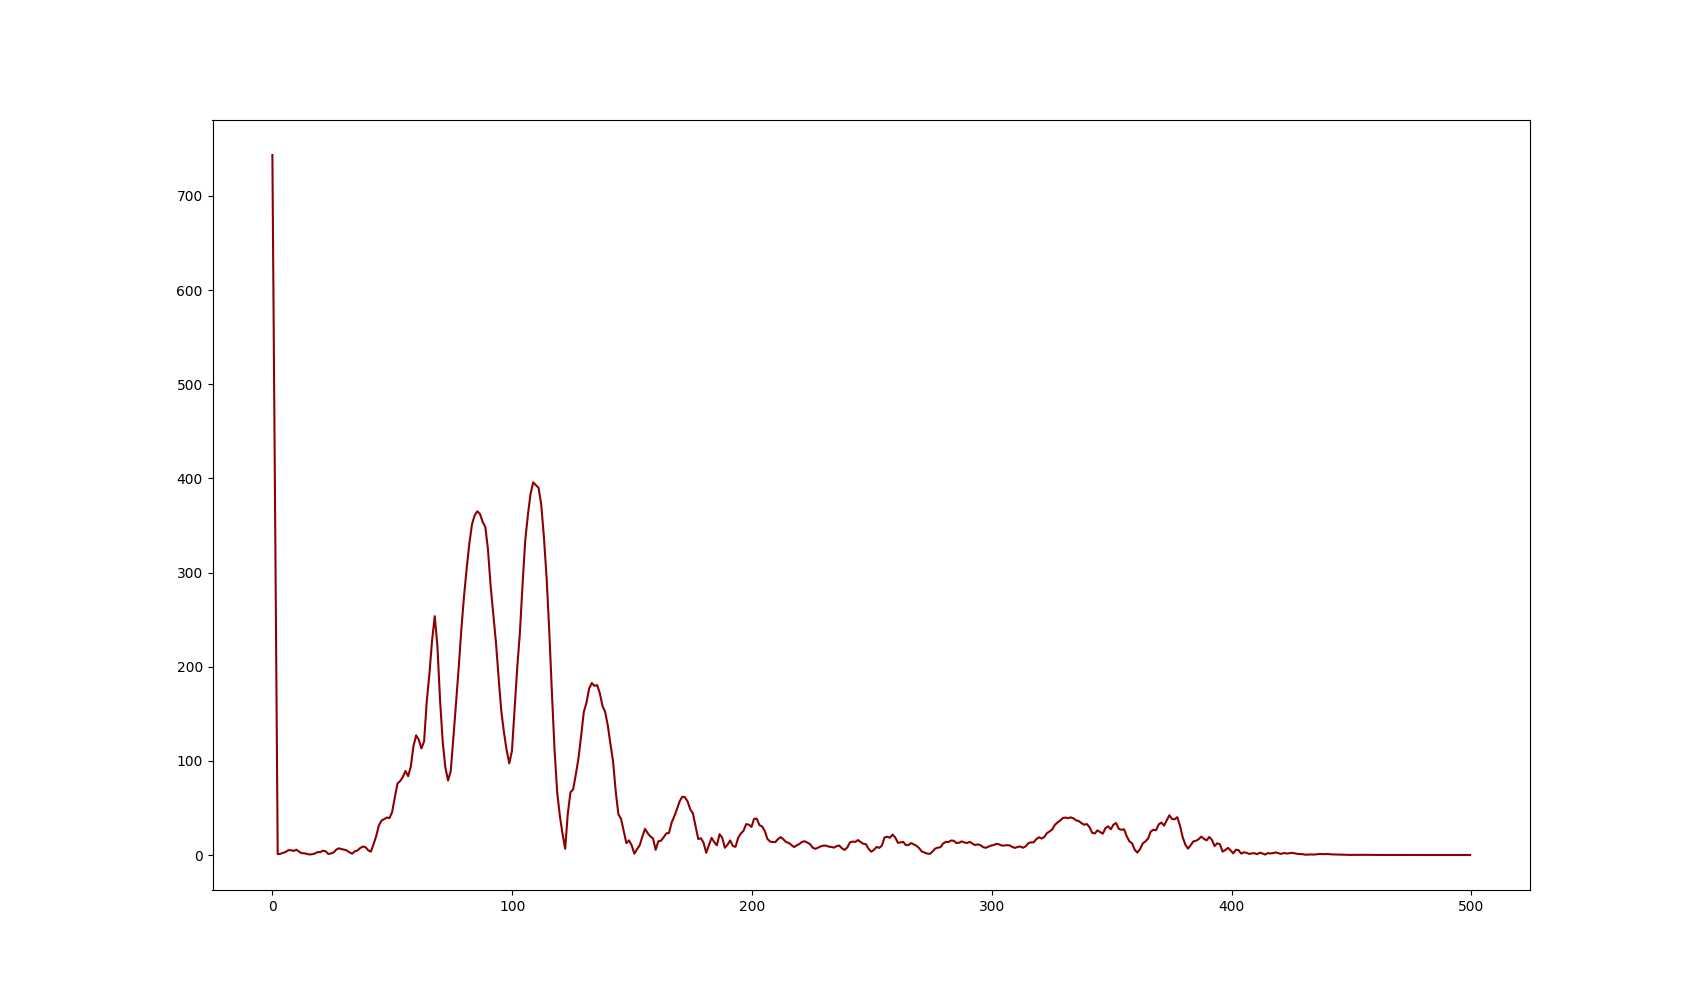

In [34]:
fig, ax = plt.subplots(1, figsize=(17, 10), sharex=True, sharey=False)

#for i in np.arange(0, len(data), 1):
    # plot waveform
ax.plot(freq, abs(amp), color='darkred')

In [ ]:
data_z_cp[2]

In [ ]:
## AIC Stuff 

In [ ]:
aic_tz, aicsz = event_processing.aic_pick(data_window_z)
aic_tx, aicsx = event_processing.aic_pick(data_window_x)
aic_ty, aicsy = event_processing.aic_pick(data_window_y)

In [ ]:
event_processing.plot_waveforms_with_aic(data_window_z,aicsz,aic_tz)

In [ ]:
event_processing.plot_waveforms_with_aic(data_window_x,aicsx,aic_tx)

In [ ]:
event_processing.plot_waveforms_with_aic(data_window_y,aicsy,aic_ty)

In [ ]:
df = data_window_z[0].stats.sampling_rate
p_pick1, s_pick1 = ar_pick(data_window_z[0].data, data_window_y[0].data, data_window_x[0].data, df,f1=30.0, f2=200.0, lta_p=0.2, sta_p=0.02, lta_s=0.1, sta_s=0.01,m_p=1, m_s=1, l_p=0.1, l_s=0.4)


In [ ]:
#p_pick2, s_pick2 = ar_pick(data_window_z[0].data, data_window_x[0].data, data_window_y[0].data, df,f1=30.0, f2=200.0, lta_p=0.2, sta_p=0.02, lta_s=0.1, sta_s=0.05,m_p=2, m_s=8, l_p=0.2, l_s=0.2, s_pick = True)

In [ ]:
T_in = data_window_z[0].times("matplotlib")
T_in_utcd = data_window_z[0].times("utcdatetime")
t_in_ucd_test1 = obspy.core.utcdatetime.UTCDateTime(data_window_z[0].stats.starttime) + p_pick1
p_pick_plt = t_in_ucd_test1.matplotlib_date

In [ ]:
T_in_utcd[0]

In [ ]:
p_pick1

In [ ]:
s_pick1

In [ ]:
data_window_z_bp = data_window_z.filter('bandpass', freqmin=50, freqmax=200, zerophase=True)

In [ ]:
kt = kurtosis(data_window_z_bp[0],4)

In [ ]:
np.max(kt)

In [ ]:
fig, ax = plt.subplots(1, figsize=(17, 10), sharex=True, sharey=False)

#for i in np.arange(0, len(data), 1):
    # plot waveform
ax.plot(T_in, data_window_z_bp[0].data, color='black')
ax.plot(T_in, kt, 'green')
    #ax[i].plot(times_mat[i], waveforms_hp[i], color='blue')
#ax.plot(data[0].times('matplotlib'), stream_bp1[0].data, color='green')
#ax.plot(data[0].times('matplotlib'), stream_bp2[0].data, color='blue')
#ax.plot(data[0].times('matplotlib'), stream_bp3[0].data, color='orange')

#ax.plot(data[0].times('matplotlib'), stream_bp4[0].data, color='red')
#ax.plot(data[0].times('matplotlib'), stream_bp5[0].data, color='violet')
#ax.plot(data[0].times('matplotlib'), stream_bp6[0].data, color='dodgerblue')
#ax.plot(data[0].times('matplotlib'), stream_bp7[0].data, color='gray')
plt.axvline(x = p_pick_plt, color = 'b', label = 'axvline - full height')
#plt.axvline(x = T_in_utcd[0]+ p_pick2, color = 'r', label = 'axvline - full height')
#ax.plot(T_in_utcd[0] + p_pick, 5000, color='darkred')
ax.xaxis.set_major_formatter(PrecisionDateFormatter("%H:%M:%S.{ms}"))

In [ ]:
import numpy as np
from copy import copy, deepcopy
from obspy.core import Trace


def do_fft(signal, delta):
    """Compute the complex Fourier transform of a signal."""
    npts = len(signal)
    if not npts % 2:
        npts -= 1

    fft = np.fft.rfft(signal, n=npts) * delta
    fftfreq = np.fft.fftfreq(len(signal), d=delta)
    fftfreq = fftfreq[0:fft.size]
    return fft, fftfreq



def do_spectrum(trace):
    """Compute the spectrum of an ObsPy Trace object."""
    signal = trace.data
    delta = trace.stats.delta
    amp, freq = do_fft(signal, delta)
    return amp, freq


In [ ]:
amp, freq = do_spectrum(data_z_cp[0])

In [ ]:
#plt.plot(freq, abs(amp), 'green')
#plt.xlabel('Frequency (Hz)')
#plt.ylabel('Amplitude')
#plt.show()

In [ ]:
fig, ax = plt.subplots(1, figsize=(17, 10), sharex=True, sharey=False)

#for i in np.arange(0, len(data), 1):
    # plot waveform
ax.plot(freq, abs(amp), color='green')

In [ ]:
data_z_cp

In [ ]:
len(freq)

In [ ]:
len(amp)

In [ ]:
freq

In [ ]:
abs(amp)

In [ ]:
#print(amp) 

In [ ]:
#print(freq)